In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
%matplotlib notebook

# Crab Nebula::

In [48]:
dcrab = np.load('crab_6hrs_3-31-2020.npz')
dataCrab = dcrab['arr_0']

<IPython.core.display.Javascript object>


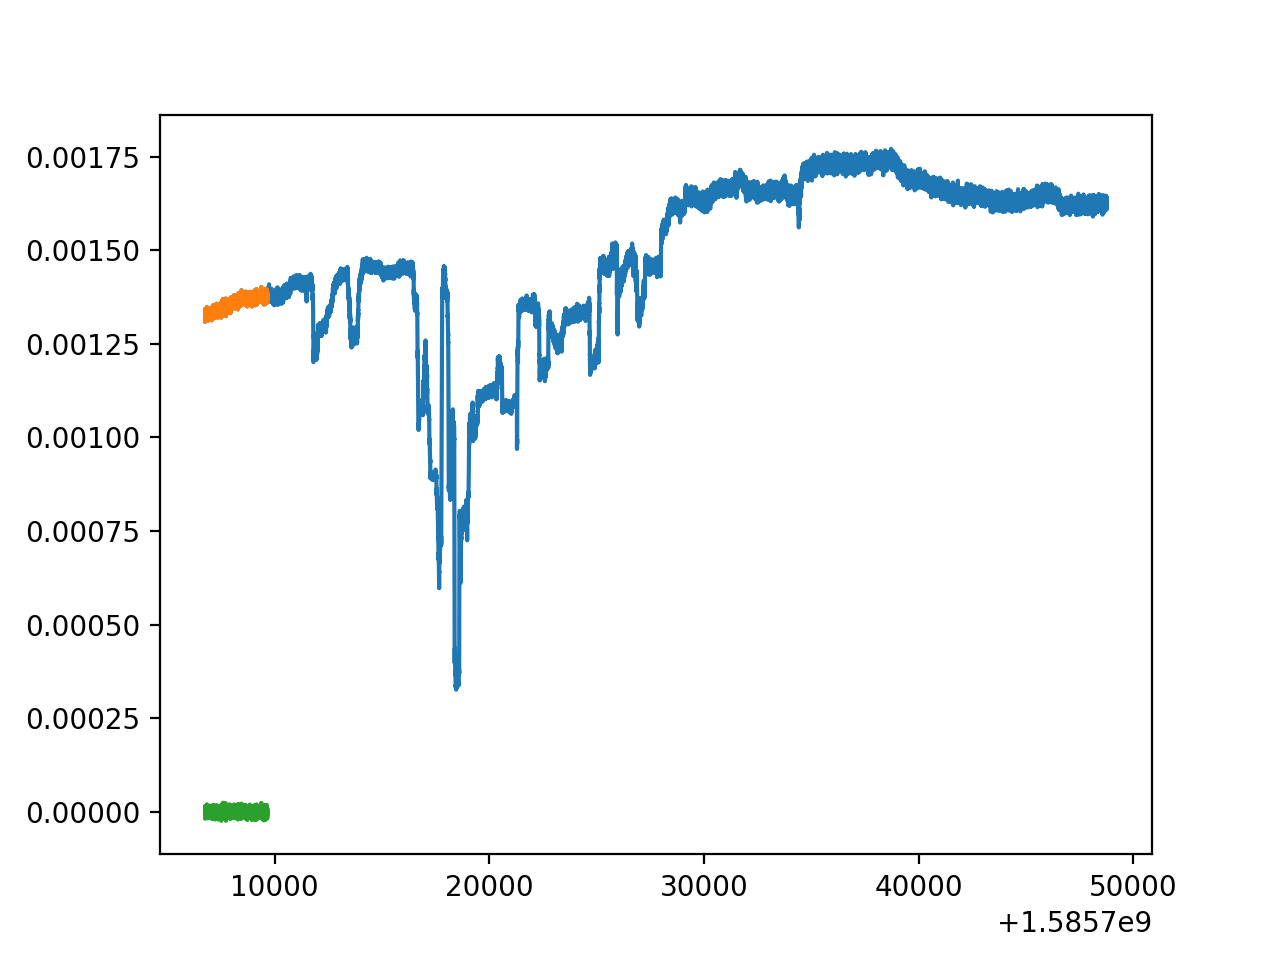

The mean of the orion signal is 2.430564430278004e-19
The standard deviation of the orion signal is 7.038438963815161e-06
The signal-to-noise of the orion signal is 3.4532720149647004e-14


In [218]:
plt.plot(dataCrab[1],dataCrab[0])
plt.plot(dataCrab[1][0:10000], dataCrab[0][0:10000])
reducedTimeCrab = dataCrab[1][0:10000]
reducedDataCrab = dataCrab[0][0:10000]
breakpoints = np.arange(0,len(reducedDataCrab), 1000)
drdc = signal.detrend(reducedDataCrab, bp=breakpoints)
rtc = reducedTimeCrab
plt.plot(rtc, drdc)
meanCrab = np.mean(drdc)
stdCrab = np.std(drdc)
snrCrab = meanCrab/stdCrab
print(f'The mean of the orion signal is {meanCrab}')
print(f'The standard deviation of the orion signal is {stdCrab}')
print(f'The signal-to-noise of the orion signal is {snrCrab}')

/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


<IPython.core.display.Javascript object>


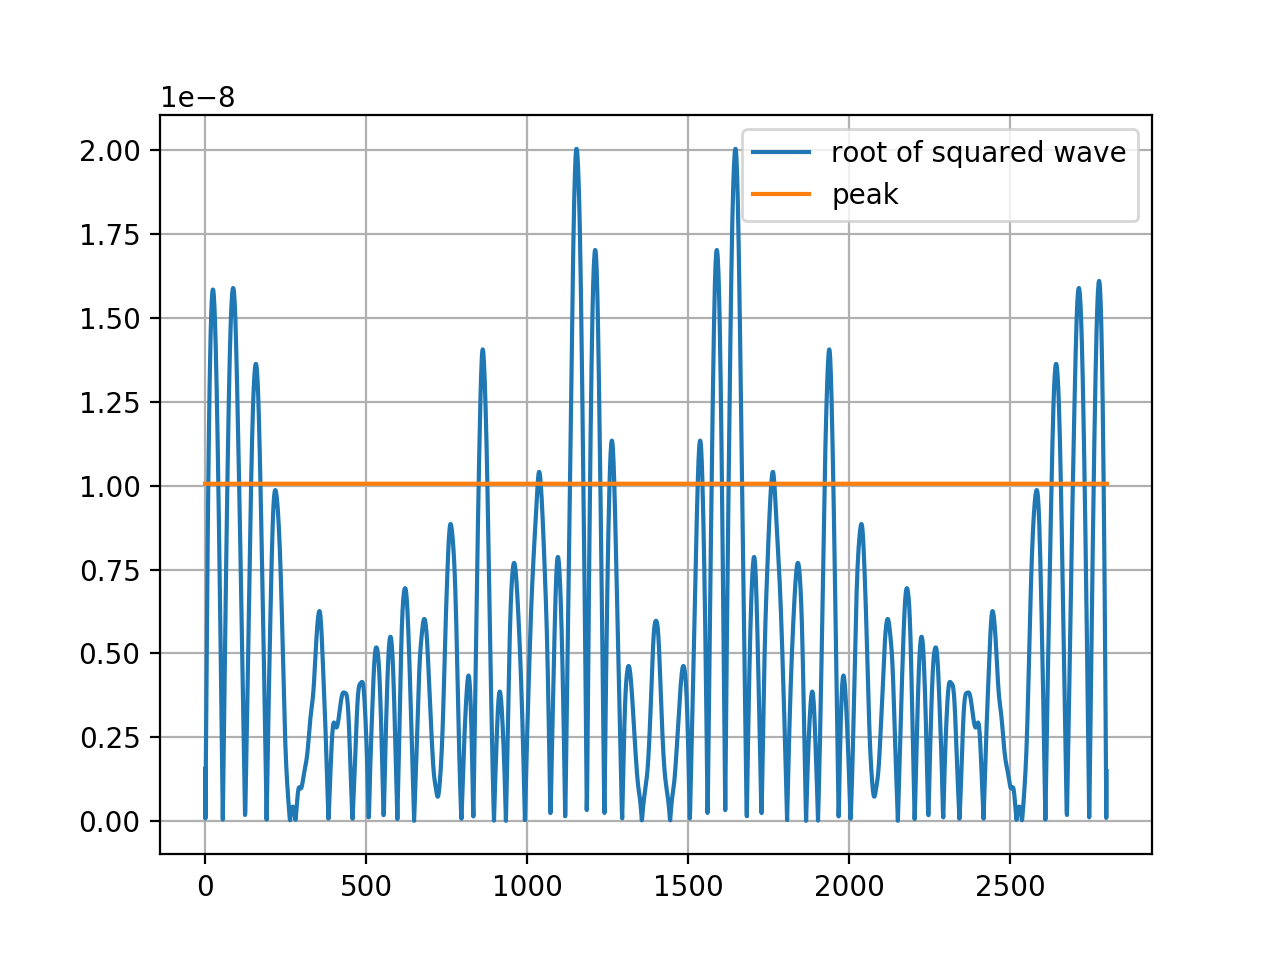

1.0054146172580907e-08


In [325]:
# fourier filtering
fftc = np.fft.fft(drdc[0:3000])
fftcaxis = np.fft.fftfreq(len(drdc[0:3000]), 1)
fftcp = np.abs(np.fft.fftshift(fftc))**2
faxis = np.fft.fftshift(fftcaxis)

# plt.plot(faxis[1250:1750], fftcp[1250:1750]) # cutout highfrequency stuff
fftcp[0:1250] = 0
fftcp[1750:] = 0
filteredfftc = np.fft.ifft(np.fft.fftshift(fftcp))[100:-100]

# regenerate time series
fsavdrdc = signal.savgol_filter(filteredfftc,151,5)
fsdrdc = fsavdrdc**2
fsmeancrab = np.mean(fsdrdc)
plt.plot(np.sqrt(fsdrdc), label="root of squared wave")
#plt.plot(fsdrdc, label="squared wave")
plt.plot(np.linspace(0,len(fsdrdc),len(fsdrdc)),[np.sqrt(2)*np.sqrt(fsmeancrab)]*len(fsdrdc), label='peak')
plt.grid()
plt.legend()
fspeakCrab = np.sqrt(2)*np.sqrt(fsmeancrab) 
print(fspeakCrab)

<IPython.core.display.Javascript object>


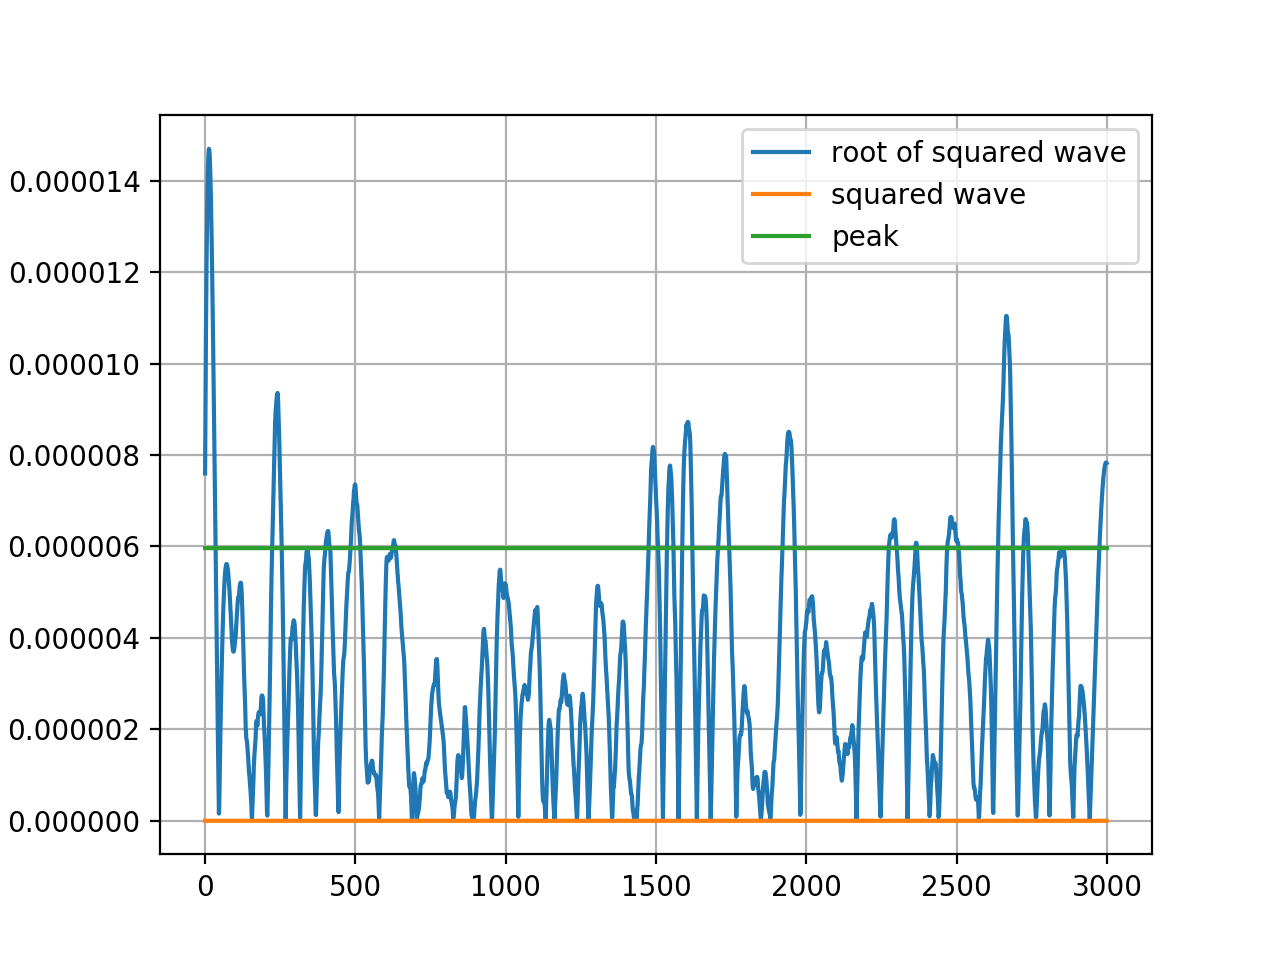

5.962770504767135e-06


In [219]:
savdrdc = signal.savgol_filter(drdc[0:3000],175,5)
sdrdc = savdrdc**2
smeancrab = np.mean(sdrdc)
plt.plot(np.sqrt(sdrdc), label="root of squared wave")
#plt.plot(sdrdc, label="squared wave")
plt.plot(np.linspace(0,len(sdrdc),len(sdrdc)),[np.sqrt(2)*np.sqrt(smeancrab)]*len(sdrdc), label='peak')
plt.grid()
plt.legend()
speakCrab = np.sqrt(2)*np.sqrt(smeancrab) 
print(speakCrab)

# The crab nebula is reported as 496 Jy, which should correspond to meanPeakCrab

# Cas A::

In [82]:
dcas = np.load('casA_15hrs_3-21-2020.npz')
dataCas = dcas['arr_0']

<IPython.core.display.Javascript object>


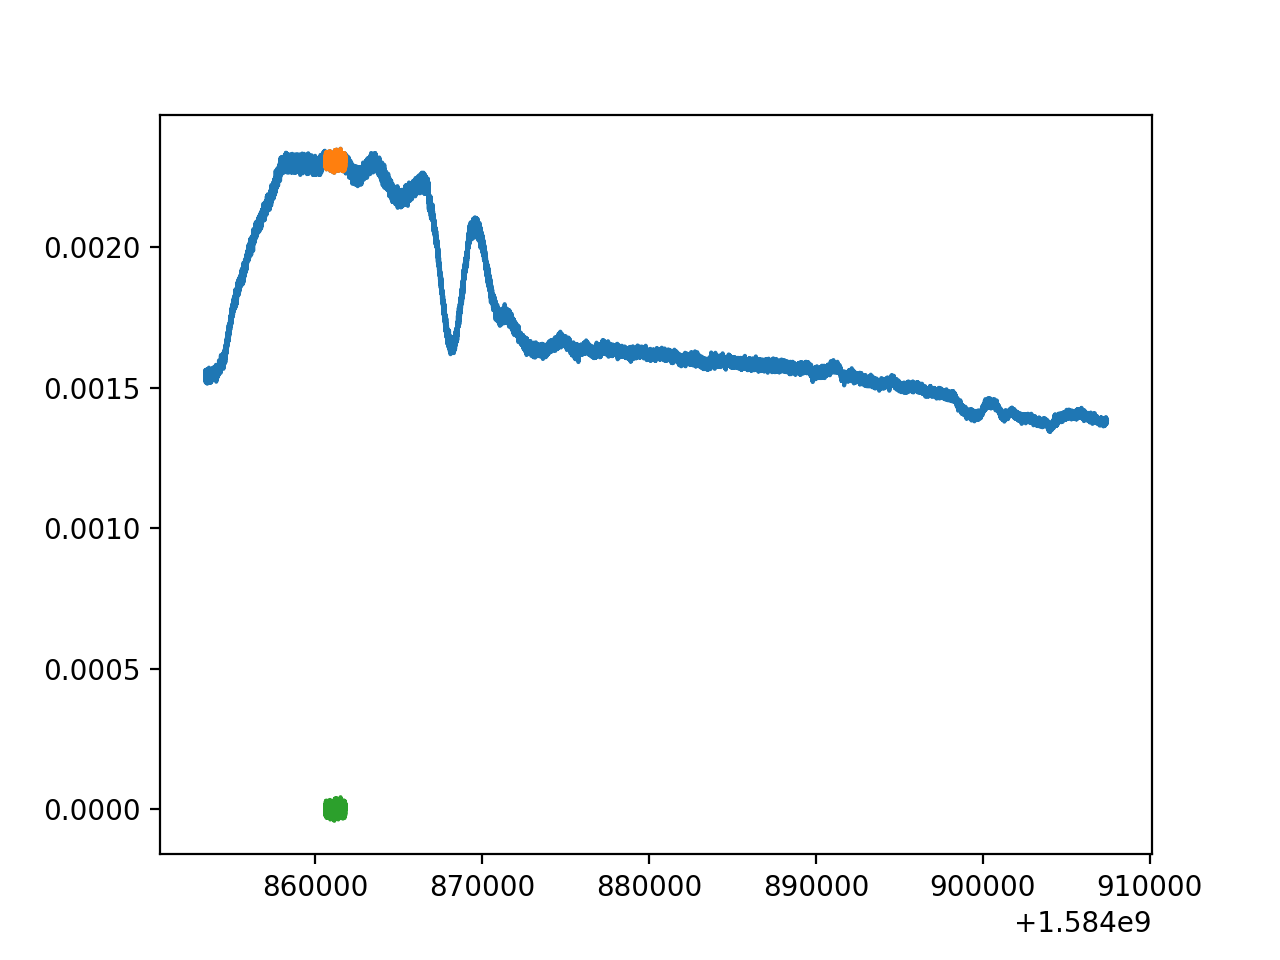

The mean of the orion signal is 3.347293507186914e-19
The standard deviation of the orion signal is 1.1396389900306752e-05
The signal-to-noise of the orion signal is 2.9371524987020817e-14


In [222]:
plt.plot(dataCas[1],dataCas[0])
plt.plot(dataCas[1][36000:42000], dataCas[0][36000:42000])
reducedTimeCas = dataCas[1][36000:42000]
reducedDataCas = dataCas[0][36000:42000]
breakpoints = np.arange(0,len(reducedDataCas), 1000)
drdca = signal.detrend(reducedDataCas, bp=breakpoints)
rtca = reducedTimeCas
plt.plot(rtca, drdca)
meanCas = np.mean(drdca)
stdCas = np.std(drdca)
snrCas = meanCas/stdCas
print(f'The mean of the orion signal is {meanCas}')
print(f'The standard deviation of the orion signal is {stdCas}')
print(f'The signal-to-noise of the orion signal is {snrCas}')

/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


<IPython.core.display.Javascript object>


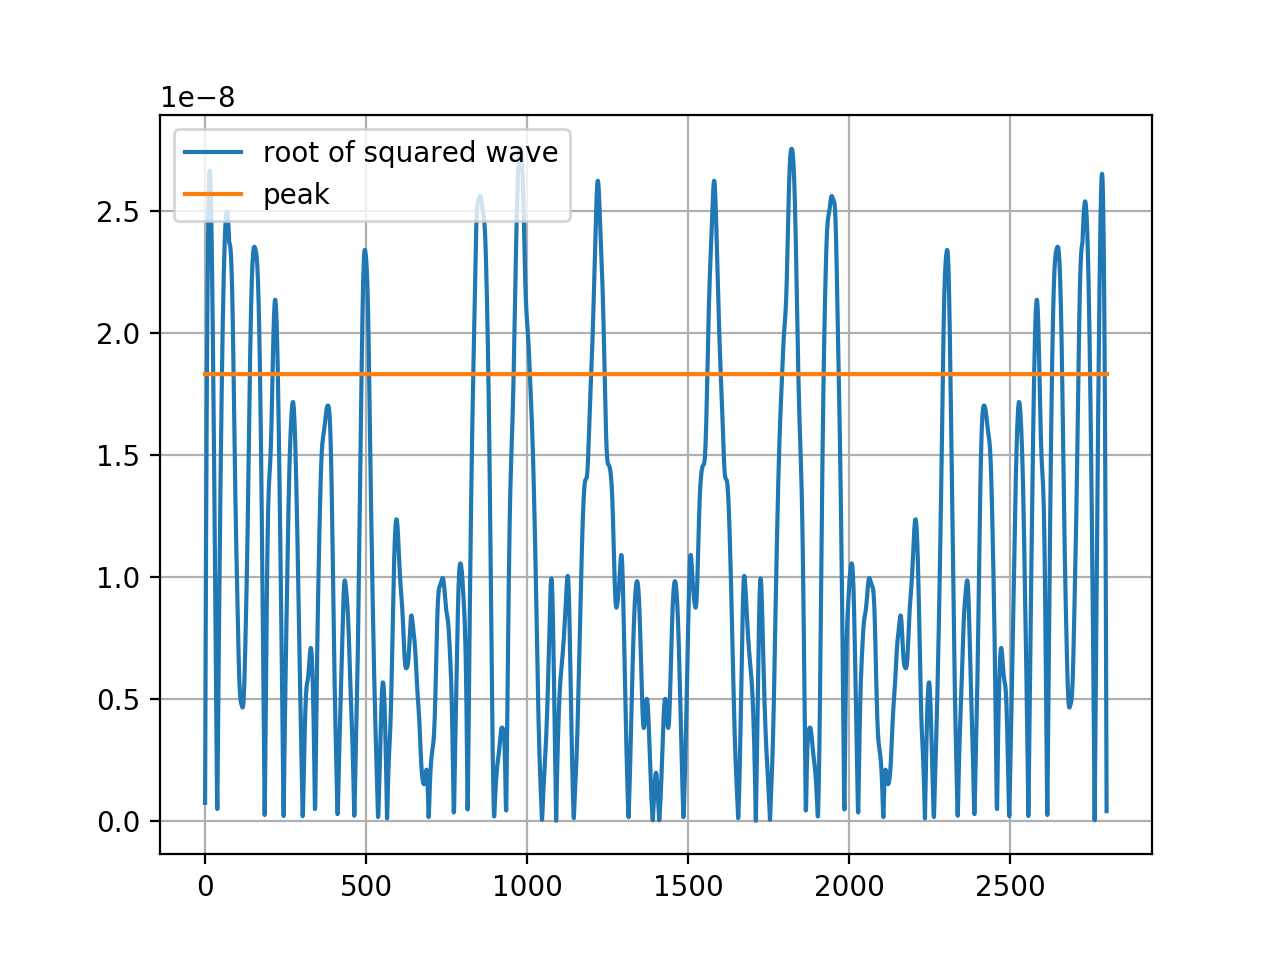

1.83259410785492e-08


In [330]:
# fourier filtering
fftca = np.fft.fft(drdca[0:3000])
fftcaaxis = np.fft.fftfreq(len(drdca[0:3000]), 1)
fftcap = np.abs(np.fft.fftshift(fftca))**2
fftcaaxis = np.fft.fftshift(fftcaaxis)

# plt.plot(faxis[1250:1750], fftcp[1250:1750]) # cutout highfrequency stuff
fftcap[0:1250] = 0
fftcap[1750:] = 0
filteredfftca = np.fft.ifft(np.fft.fftshift(fftcap))[100:-100]

# regenerate time series
fsavdrdca = signal.savgol_filter(filteredfftca,151,5)
fsdrdca = fsavdrdca**2
fsmeancas = np.mean(fsdrdca)
plt.plot(np.sqrt(fsdrdca), label="root of squared wave")
plt.plot(np.linspace(0,len(fsdrdca),len(fsdrdca)),[np.sqrt(2)*np.sqrt(fsmeancas)]*len(fsdrdca), label='peak')
plt.grid()
plt.legend()
fspeakCas = np.sqrt(2)*np.sqrt(fsmeancas) 
print(fspeakCas)

<IPython.core.display.Javascript object>


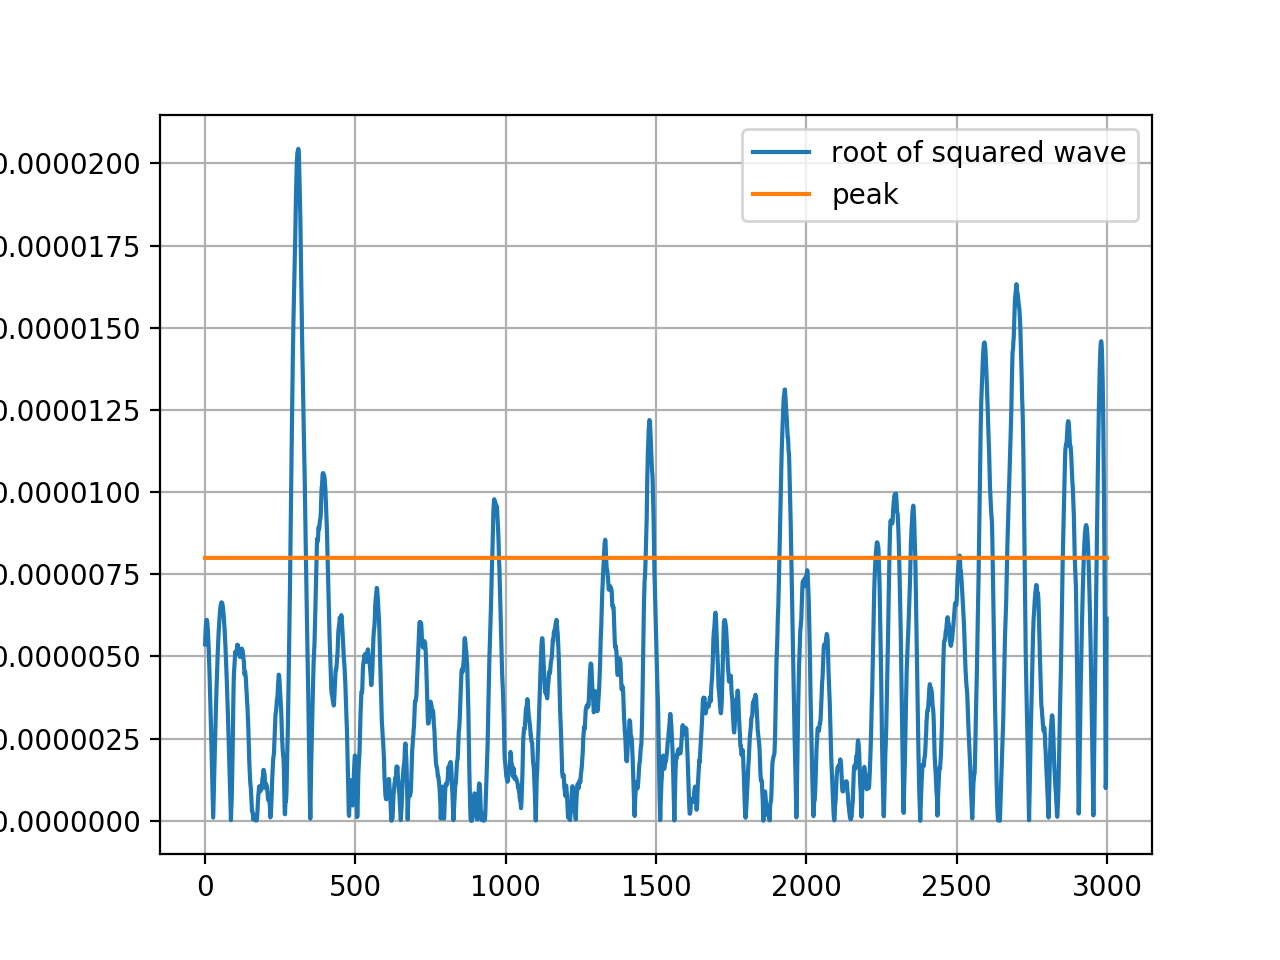

8.000665727437525e-06


In [229]:
savdrdca = signal.savgol_filter(drdca[0:3000],175,5)
sdrdca = savdrdca**2
smeancas = np.mean(sdrdca)
plt.plot(np.sqrt(sdrdca), label="root of squared wave")
#plt.plot(sdrdca, label="squared wave")
plt.plot(np.linspace(0,len(sdrdca),len(sdrdca)),[np.sqrt(2)*np.sqrt(smeancas)]*len(sdrdca), label='peak')
plt.grid()
plt.legend()
speakCas = np.sqrt(2)*np.sqrt(smeancas) 
print(speakCas)

# Orion Nebula::

In [145]:
dorion = np.load('orion_3hrs_4-3-2020.npz')
dataOrion = dorion['arr_0']

<IPython.core.display.Javascript object>


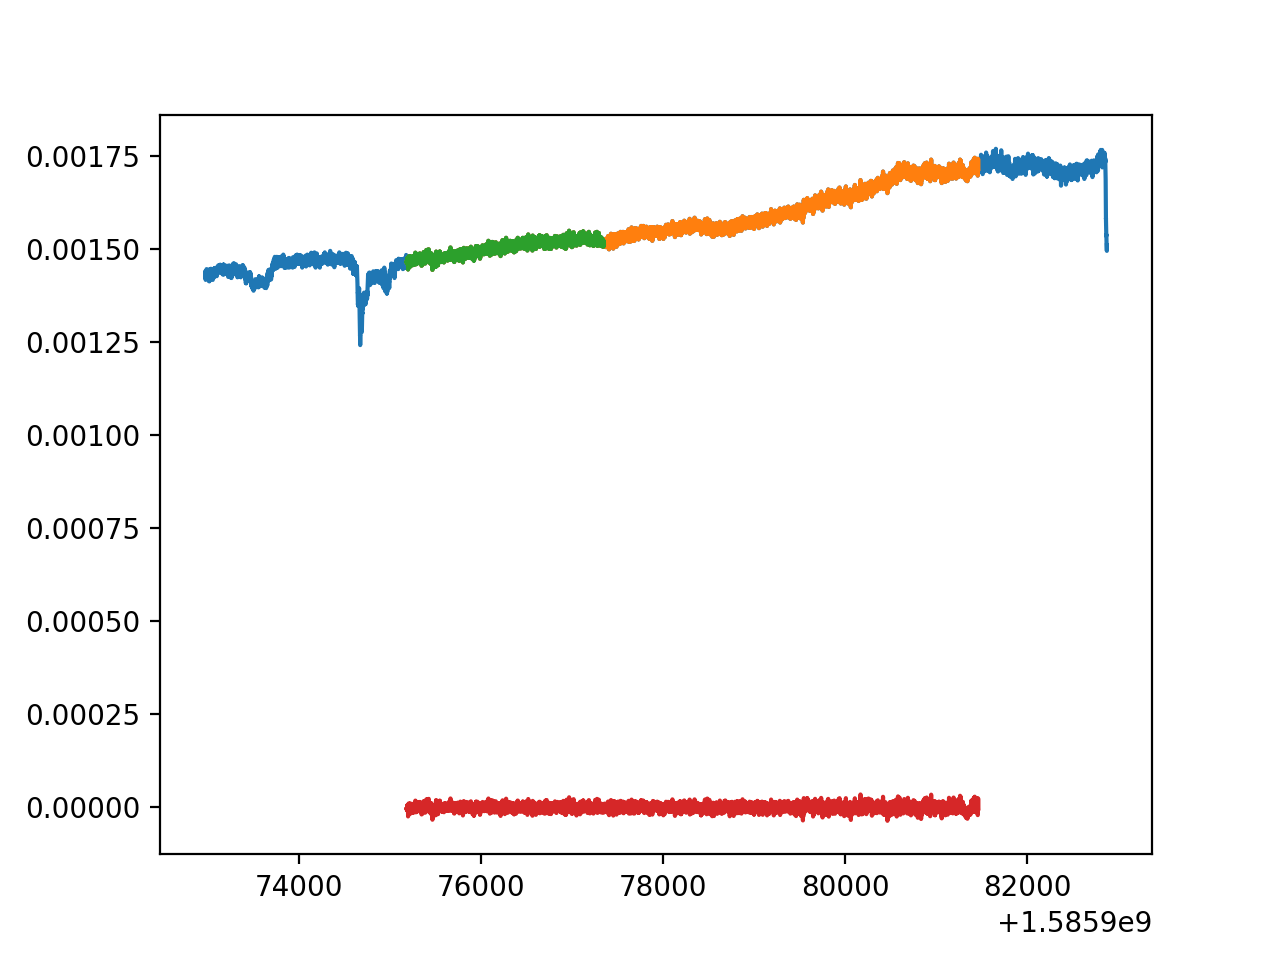

The mean of the orion signal is 2.450537843633348e-19
The standard deviation of the orion signal is 8.087923095506387e-06
The signal-to-noise of the orion signal is 3.0298728297686895e-14


In [216]:
plt.plot(dataOrion[1],dataOrion[0])
plt.plot(dataOrion[1][7000:25000], dataOrion[0][7000:25000])
plt.plot(dataOrion[1][7000:13000], dataOrion[0][7000:13000])
reducedTimeOrion = dataOrion[1][7000:25000]
reducedDataOrion = dataOrion[0][7000:25000]
breakpoints = np.arange(0,len(reducedDataOrion), 1000)
drdo = signal.detrend(reducedDataOrion, bp=breakpoints)
rto = reducedTimeOrion
plt.plot(rto, drdo)
meanOrion = np.mean(drdo)
stdOrion = np.std(drdo)
snrOrion = meanOrion/stdOrion
print(f'The mean of the orion signal is {meanOrion}')
print(f'The standard deviation of the orion signal is {stdOrion}')
print(f'The signal-to-noise of the orion signal is {snrOrion}')

/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


<IPython.core.display.Javascript object>


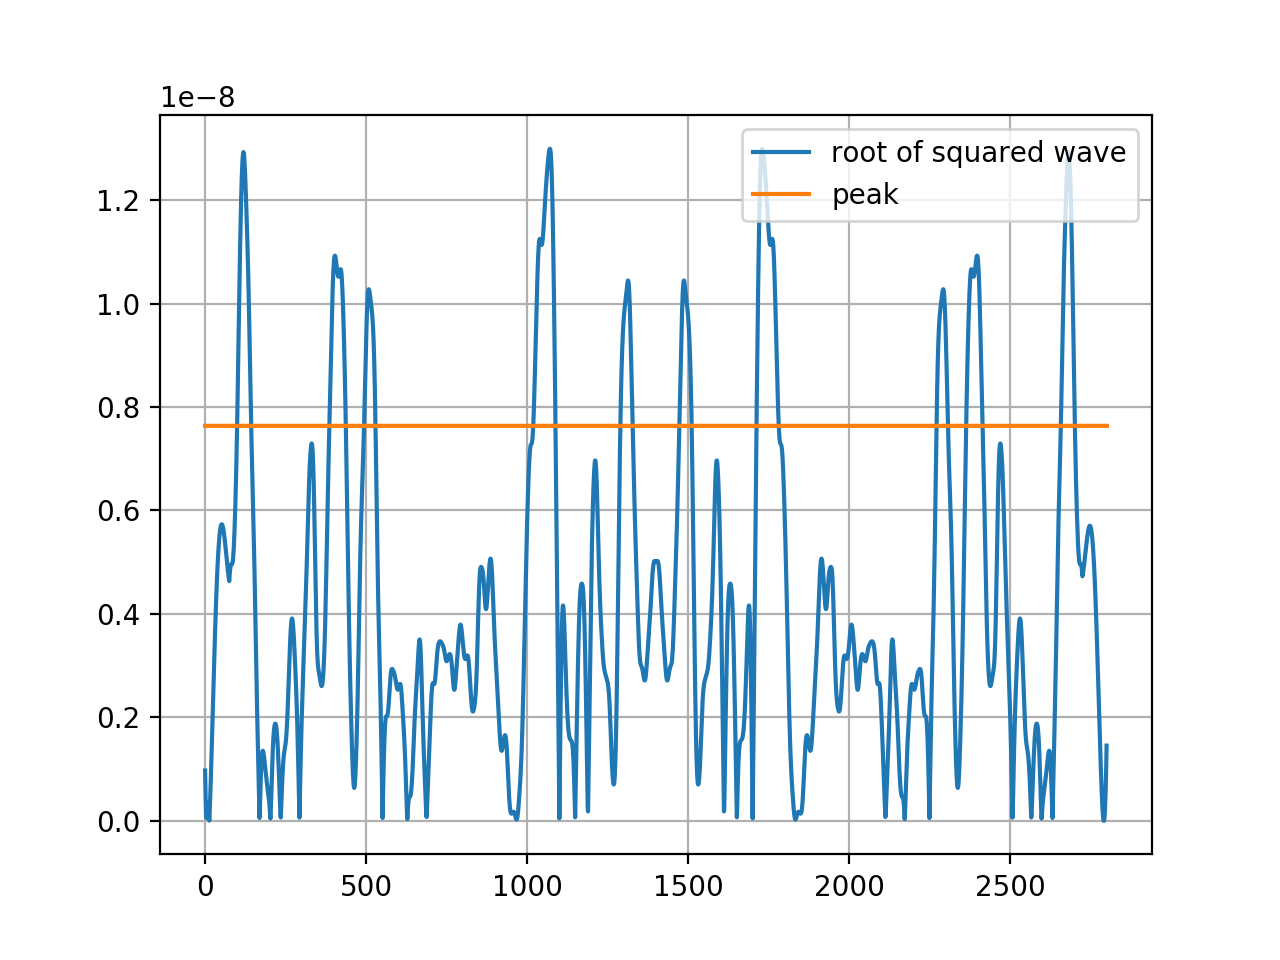

7.635224218449462e-09


In [326]:
# fourier filtering
ffto = np.fft.fft(drdo[0:3000])
fftoaxis = np.fft.fftfreq(len(drdo[0:3000]), 1)
fftop = np.abs(np.fft.fftshift(ffto))**2
fftoaxis = np.fft.fftshift(fftoaxis)

# plt.plot(faxis[1250:1750], fftcp[1250:1750]) # cutout highfrequency stuff
fftop[0:1250] = 0
fftop[1750:] = 0
filteredffto = np.fft.ifft(np.fft.fftshift(fftop))[100:-100]

# regenerate time series
fsavdrdo = signal.savgol_filter(filteredffto,151,5)
fsdrdo = fsavdrdo**2
fsmeanorion = np.mean(fsdrdo)
plt.plot(np.sqrt(fsdrdo), label="root of squared wave")
plt.plot(np.linspace(0,len(fsdrdo),len(fsdrdo)),[np.sqrt(2)*np.sqrt(fsmeanorion)]*len(fsdrdo), label='peak')
plt.grid()
plt.legend()
fspeakOrion = np.sqrt(2)*np.sqrt(fsmeanorion) 
print(fspeakOrion)

<IPython.core.display.Javascript object>


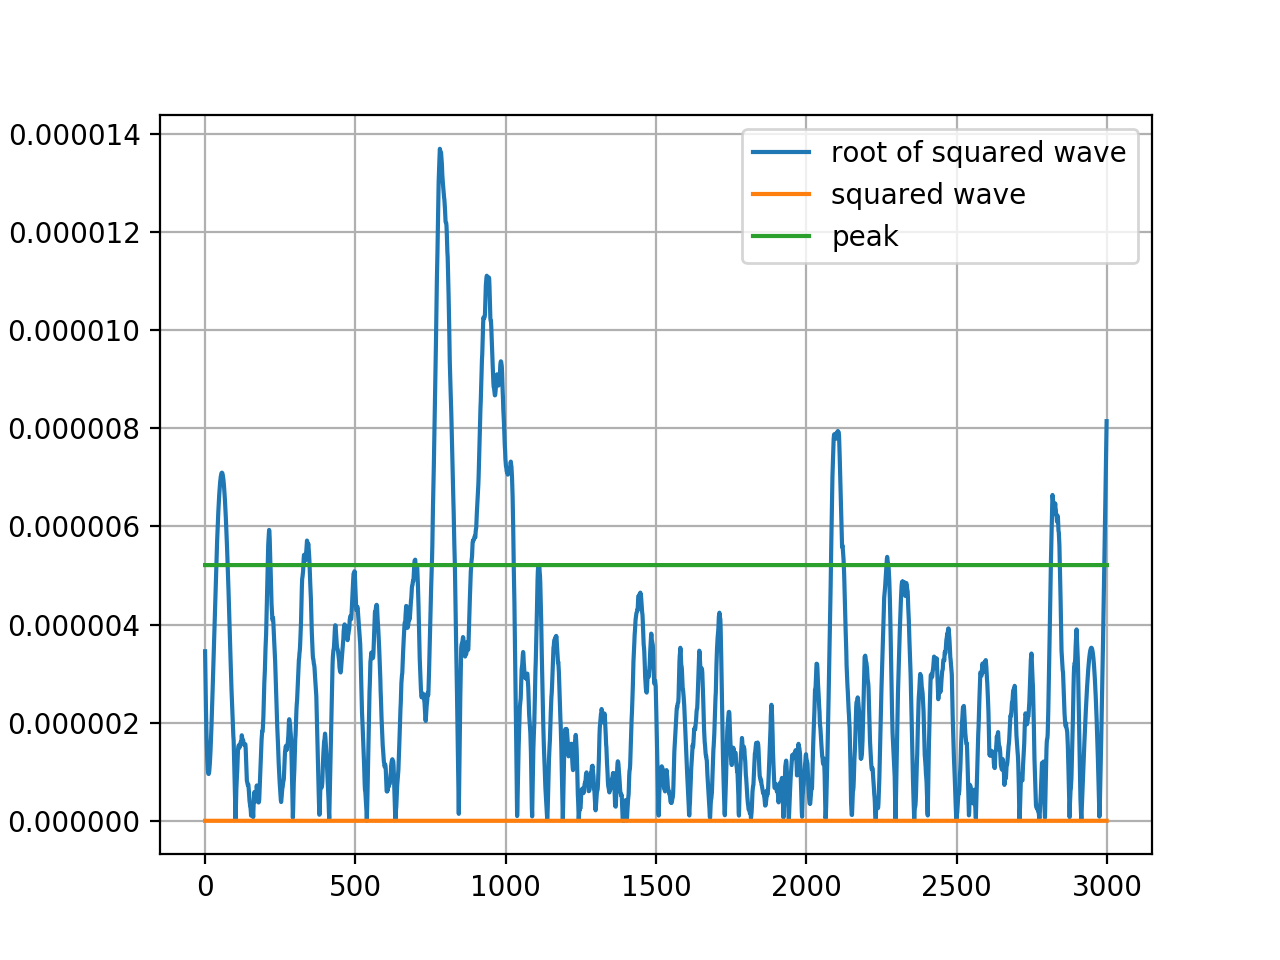

5.211671473582264e-06


In [232]:
savdrdo = signal.savgol_filter(drdo[0:3000],175,5)
sdrdo = savdrdo**2
smeanorion = np.mean(sdrdo)
plt.plot(np.sqrt(sdrdo), label="root of squared wave")
plt.plot(np.linspace(0,len(sdrdo),len(sdrdo)),[np.sqrt(2)*np.sqrt(smeanorion)]*len(sdrdo), label='peak')
plt.grid()
plt.legend()
speakOrion = np.sqrt(2)*np.sqrt(smeanorion) 
print(speakOrion)


# Zenith (Noise)::

In [172]:
dzenith = np.load('data.npz')
dataZenith = dzenith['arr_0']

<IPython.core.display.Javascript object>


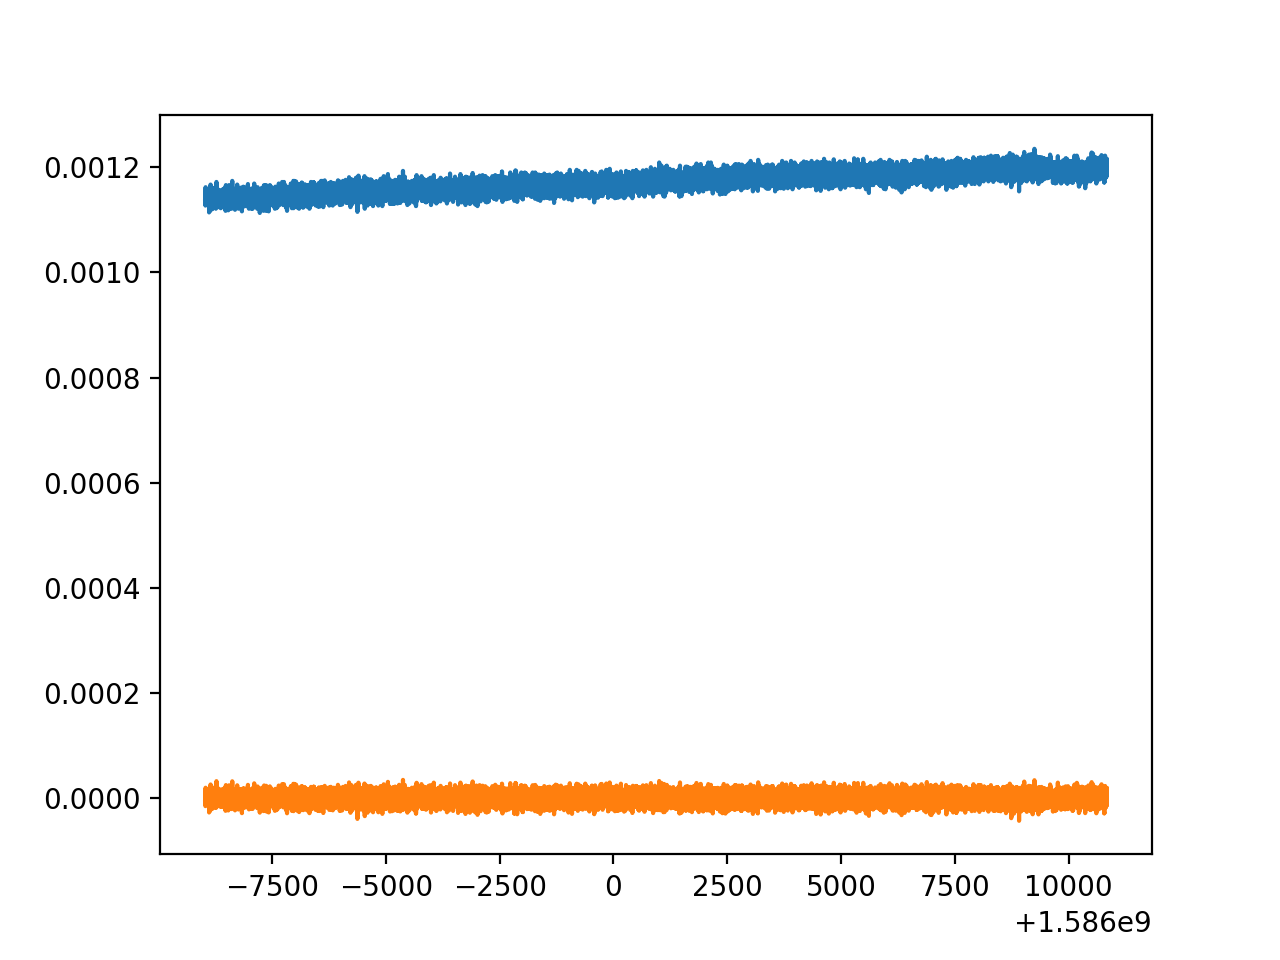

The mean of the zenith signal is 1.7639421639528849e-19
The standard deviation of the zenith signal is 8.736758535489016e-06
The signal-to-noise of the zenith signal is 2.018989258759631e-14


In [175]:
plt.plot(dataZenith[1],dataZenith[0])
#plt.plot(dataOrion[1][7000:25000], dataOrion[0][7000:25000])
#plt.plot(dataOrion[1][7000:13000], dataOrion[0][7000:13000])
#reducedTimeOrion = dataOrion[1][7000:25000]
#reducedDataOrion = dataOrion[0][7000:25000]
breakpoints = np.arange(0,len(dataZenith[0]), 1000)
dz = signal.detrend(dataZenith[0], bp=breakpoints)
plt.plot(dataZenith[1], dz)
meanZenith = np.mean(dz)
stdZenith = np.std(dz)
snrZenith = meanZenith/stdZenith
print(f'The mean of the zenith signal is {meanZenith}')
print(f'The standard deviation of the zenith signal is {stdZenith}')
print(f'The signal-to-noise of the zenith signal is {snrZenith}')

/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


<IPython.core.display.Javascript object>


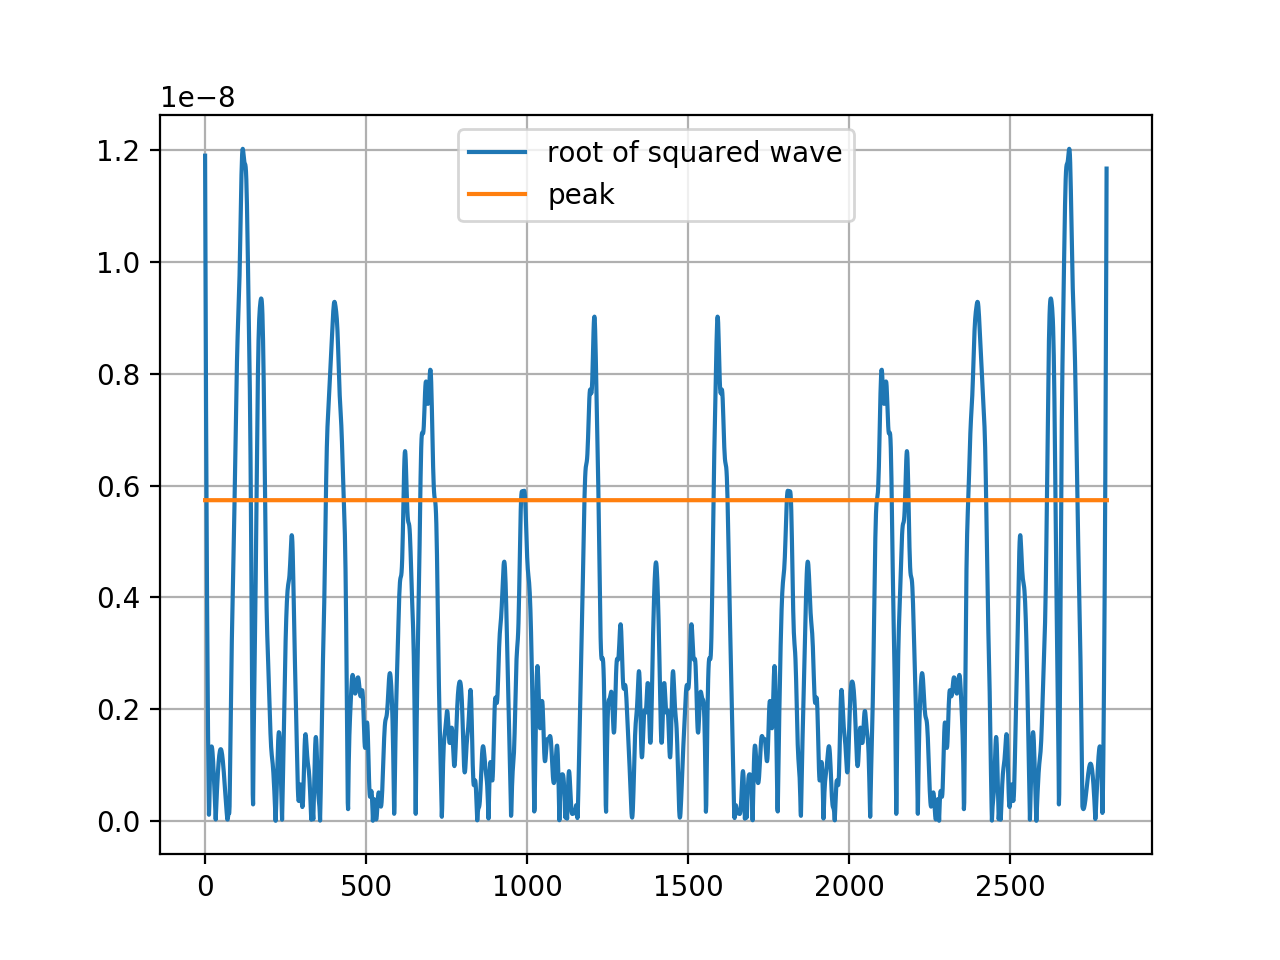

5.7410255383441515e-09


In [324]:
# fourier filtering
fftz = np.fft.fft(dz[0:3000])
fftzaxis = np.fft.fftfreq(len(dz[0:3000]), 1)
fftzp = np.abs(np.fft.fftshift(fftz))**2
fftzaxis = np.fft.fftshift(fftzaxis)

# plt.plot(faxis[1250:1750], fftcp[1250:1750]) # cutout highfrequency stuff
fftzp[0:1250] = 0
fftzp[1750:] = 0
filteredfftz = np.fft.ifft(np.fft.fftshift(fftzp))[100:-100]

# regenerate time series
fsavdz = signal.savgol_filter(filteredfftz,151,5)
fsdz = fsavdz**2
fsmeanzenith = np.mean(fsdz)
plt.plot(np.sqrt(fsdz), label="root of squared wave")
#plt.plot(fsdrdc, label="squared wave")
plt.plot(np.linspace(0,len(fsdz),len(fsdz)),[np.sqrt(2)*np.sqrt(fsmeanzenith)]*len(fsdz), label='peak')
plt.grid()
plt.legend()
fspeakZenith = np.sqrt(2)*np.sqrt(fsmeanzenith) 
print(fspeakZenith)

<IPython.core.display.Javascript object>


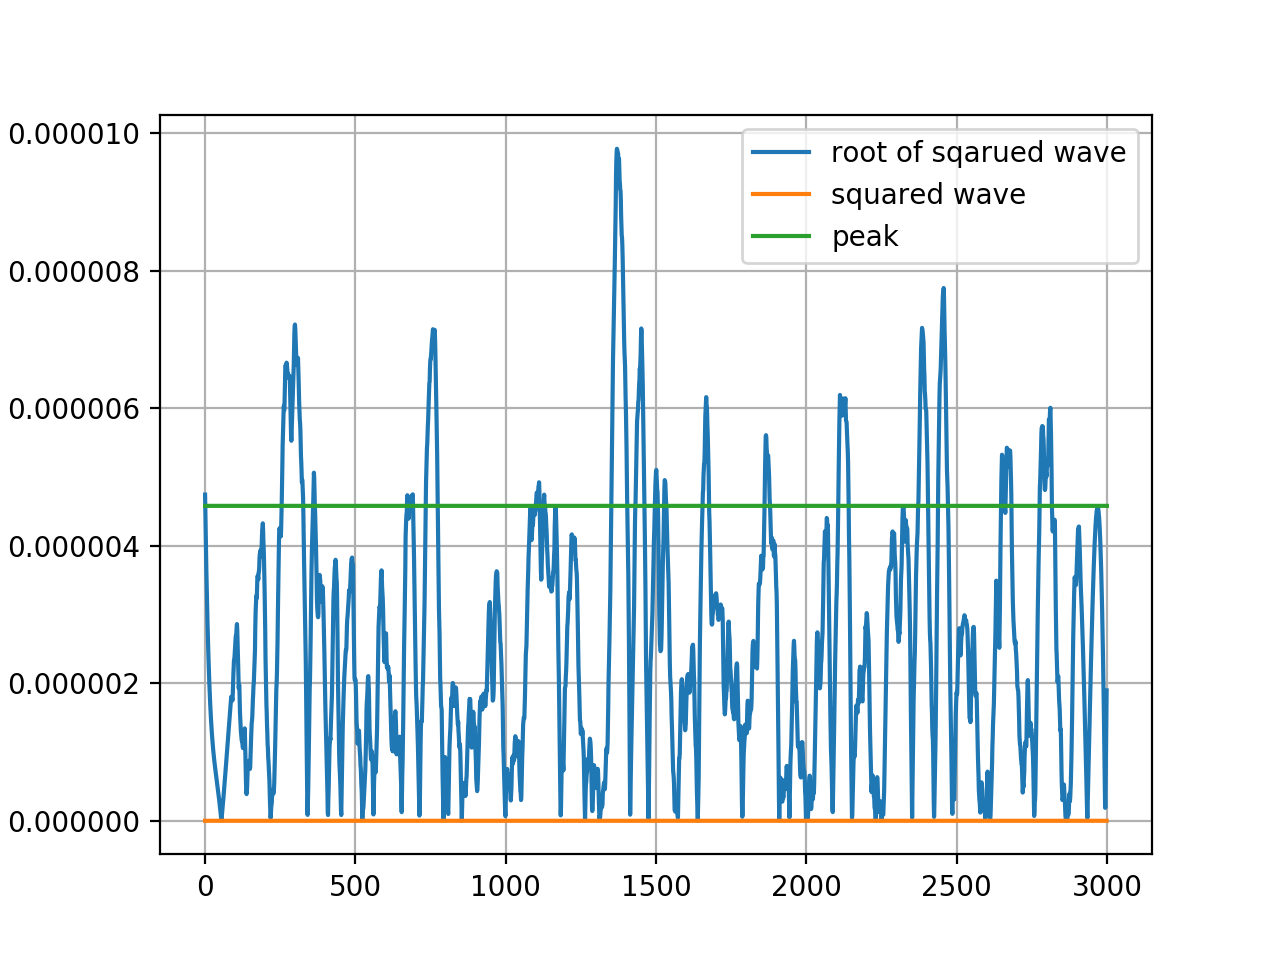

4.580391340817682e-06


In [237]:
savdz = signal.savgol_filter(dz[0:3000],175,5)
sdz = savdz**2
smeanzenith = np.mean(sdz)
plt.plot(np.sqrt(sdz), label="root of sqarued wave")
ssdz = signal.savgol_filter(np.sqrt(sdz),175,5)
plt.plot(sdz, label="squared wave")
#plt.plot(ssdz, label="smoothed root of sqared wave")
plt.plot(np.linspace(0,len(sdz),len(sdz)),[np.sqrt(2)*np.sqrt(smeanzenith)]*len(sdz), label='peak')
plt.grid()
plt.legend()
speakZenith = np.sqrt(2)*np.sqrt(smeanzenith)
print(speakZenith)


# Virgo A::

In [204]:
dvirgo = np.load('virgoA_9.5hrs_4-2-2020.npz')
dataVirgo = dvirgo['arr_0']

<IPython.core.display.Javascript object>


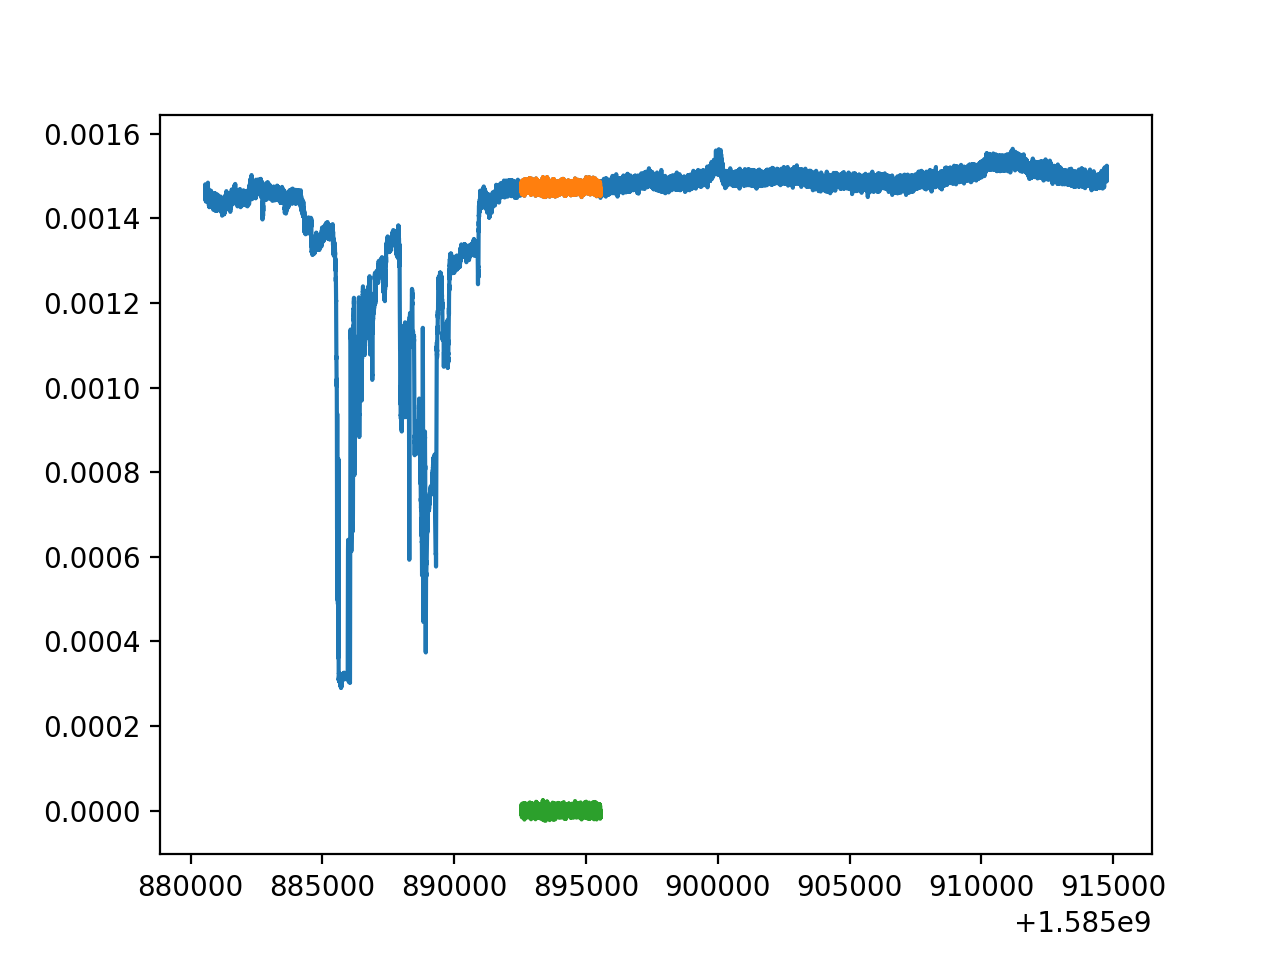

The mean of the orion signal is 2.3609586508044344e-19
The standard deviation of the orion signal is 6.801826382826283e-06
The signal-to-noise of the orion signal is 3.4710657372342587e-14


In [212]:
plt.plot(dataVirgo[1],dataVirgo[0])
plt.plot(dataVirgo[1][60000:75000], dataVirgo[0][60000:75000])
reducedTimeVirgo = dataVirgo[1][60000:75000]
reducedDataVirgo = dataVirgo[0][60000:75000]
breakpoints = np.arange(0,len(reducedDataVirgo), 1000)
drdv = signal.detrend(reducedDataVirgo, bp=breakpoints)
rtv = reducedTimeVirgo
plt.plot(rtv, drdv)
meanVirgo = np.mean(drdv)
stdVirgo = np.std(drdv)
snrVirgo = meanVirgo/stdVirgo
print(f'The mean of the orion signal is {meanVirgo}')
print(f'The standard deviation of the orion signal is {stdVirgo}')
print(f'The signal-to-noise of the orion signal is {snrVirgo}')

/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


<IPython.core.display.Javascript object>


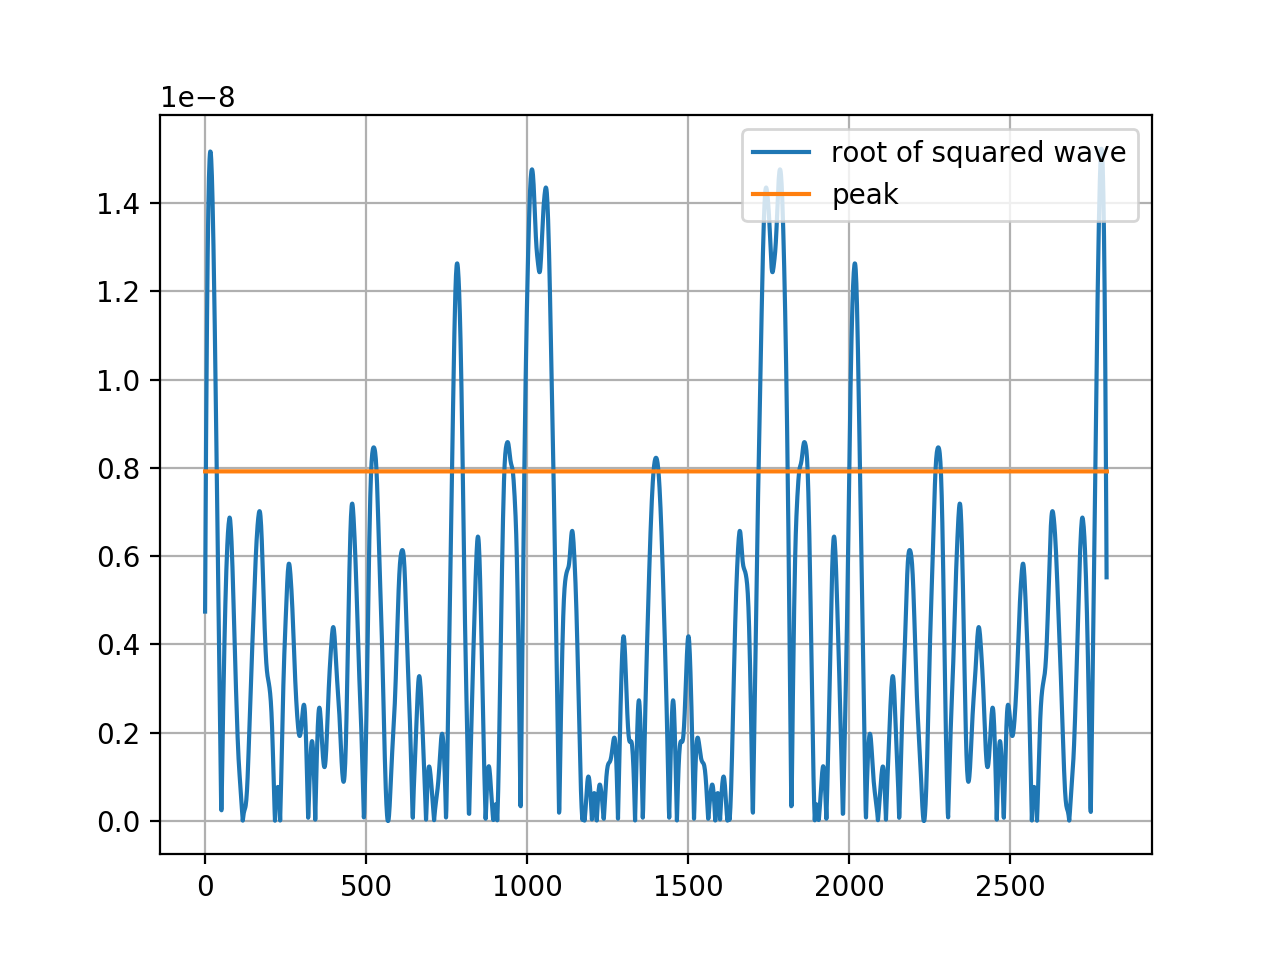

7.921824448304165e-09


In [323]:
# fourier filtering
fftv = np.fft.fft(drdv[0:3000])
fftvaxis = np.fft.fftfreq(len(drdv[0:3000]), 1)
fftvp = np.abs(np.fft.fftshift(fftv))**2
fftvaxis = np.fft.fftshift(fftvaxis)

# plt.plot(faxis[1250:1750], fftcp[1250:1750]) # cutout highfrequency stuff
fftvp[0:1250] = 0
fftvp[1750:] = 0
filteredfftv = np.fft.ifft(np.fft.fftshift(fftvp))[100:-100]

# regenerate time series
fsavdrdv = signal.savgol_filter(filteredfftv,151,5)
fsdrdv = fsavdrdv**2
fsmeanvirgo = np.mean(fsdrdv)
plt.plot(np.sqrt(fsdrdv), label="root of squared wave")
plt.plot(np.linspace(0,len(fsdrdv),len(fsdrdv)),[np.sqrt(2)*np.sqrt(fsmeanvirgo)]*len(fsdrdv), label='peak')
plt.grid()
plt.legend()
fspeakVirgo = np.sqrt(2)*np.sqrt(fsmeanvirgo) 
print(fspeakVirgo)

<IPython.core.display.Javascript object>


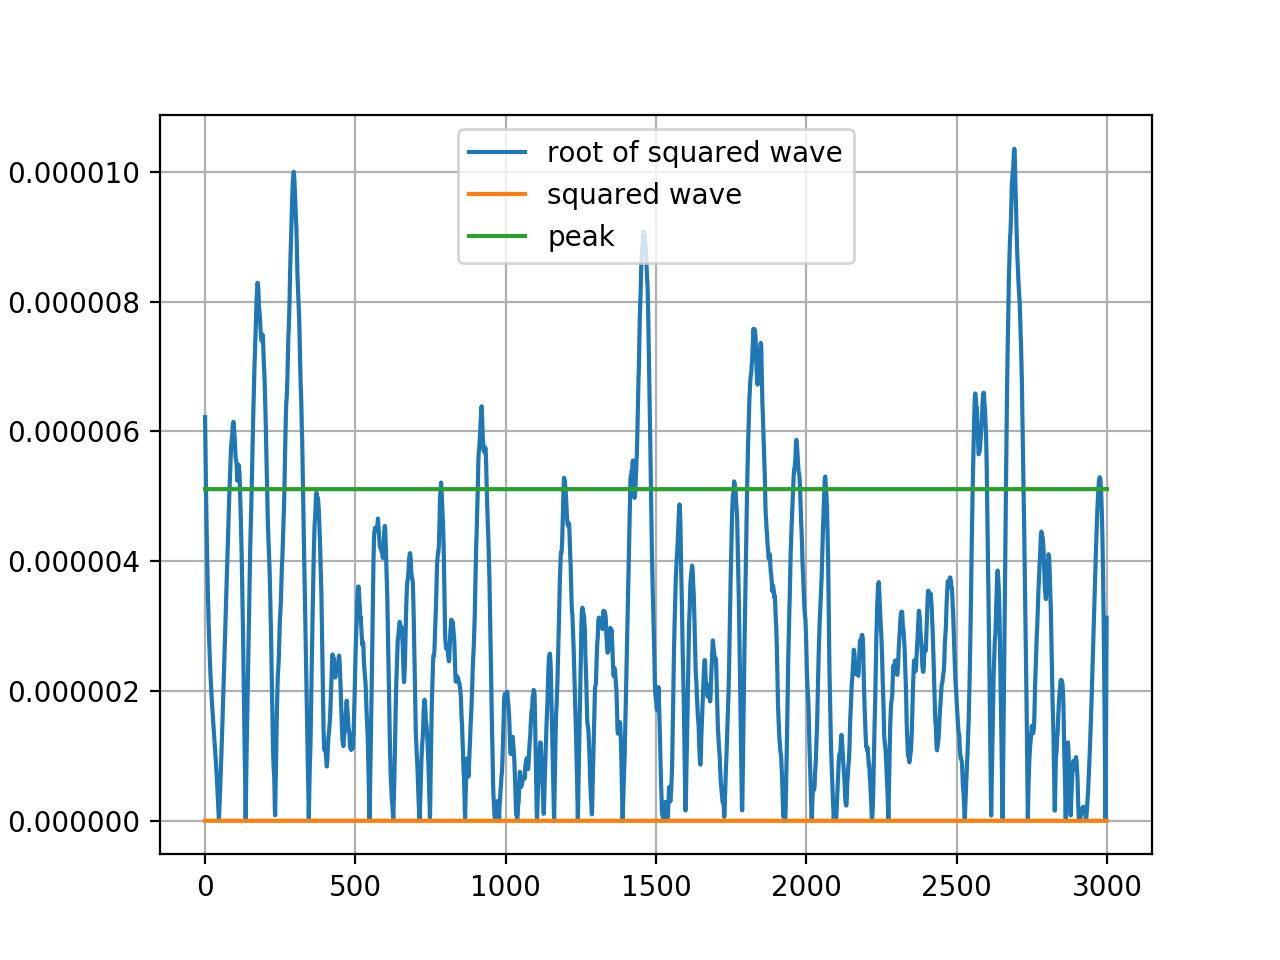

5.111166311777609e-06


In [234]:
savdrdv = signal.savgol_filter(drdv[0:3000],175,5)
sdrdv = savdrdv**2
smeanvirgo = np.mean(sdrdv)
plt.plot(np.sqrt(sdrdv), label="root of squared wave")
plt.plot(sdrdv, label="squared wave")
plt.plot(np.linspace(0,len(sdrdv),len(sdrdv)),[np.sqrt(2)*np.sqrt(smeanvirgo)]*len(sdrdv), label='peak')
plt.grid()
plt.legend()
speakVirgo = np.sqrt(2)*np.sqrt(smeanvirgo)
print(speakVirgo)

# Final Results::

In [238]:
print(f'Vpeak of Crab Nebula = {speakCrab}')
print(f'Vpeak of Orion Nebula = {speakOrion}')
print(f'Vpeak of Cassiopeia A = {speakCas}')
print(f'Vpeak of Virgo A = {speakVirgo}')
print(f'Vpeak of Zenith Noise = {speakZenith}')


Vpeak of Crab Nebula = 5.962770504767135e-06
Vpeak of Orion Nebula = 5.211671473582264e-06
Vpeak of Cassiopeia A = 8.000665727437525e-06
Vpeak of Virgo A = 5.111166311777609e-06
Vpeak of Zenith Noise = 4.580391340817682e-06


In [242]:
print(f'For Crab Nebula 1 Jy = {speakCrab/496} Volts')
print(f'For Cassiopeia A 1 Jy = {speakCas/320} Volts')
print(f'For Virgo A 1 Jy = {speakVirgo/40} Volts')
print(f'For Orion Nebula 1 Jy = {speakOrion/340} Volts')

For Crab Nebula 1 Jy = 1.2021714727353096e-08 Volts
For Cassiopeia A 1 Jy = 2.5002080398242265e-08 Volts
For Virgo A 1 Jy = 1.2777915779444023e-07 Volts
For Orion Nebula 1 Jy = 1.532844551053607e-08 Volts


In [335]:
crab = speakCrab/496
cas = speakCas/320
virgo = speakVirgo/40
orion = speakOrion/340
averagejy = (crab+cas+virgo+orion)/4
print(f'The average volts per Jy is {averagejy}')

The average volts per Jy is 4.503284960764292e-08


In [255]:
rr1 = 340/35.5

In [256]:
rr2 = speakOrion/speakVirgo

In [257]:
error = np.abs(rr1 - rr2)/rr1
print(f'The aboslute error is {error*100}%')

The aboslute error is 89.35350989518521%


In [270]:
35.5/140.79 # Virgo/Cygnus

0.25214859009872864

In [327]:
rr3 = fspeakOrion/fspeakVirgo

In [328]:
error = np.abs(rr1 - rr3)/rr1
print(f'The aboslute error is {error*100}%')

The aboslute error is 89.9365702967066%


In [331]:
print(f'Vpeak of Crab Nebula = {fspeakCrab}')
print(f'Vpeak of Orion Nebula = {fspeakOrion}')
print(f'Vpeak of Cassiopeia A = {fspeakCas}')
print(f'Vpeak of Virgo A = {fspeakVirgo}')
print(f'Vpeak of Zenith Noise = {fspeakZenith}')

Vpeak of Crab Nebula = 1.0054146172580907e-08
Vpeak of Orion Nebula = 7.635224218449462e-09
Vpeak of Cassiopeia A = 1.83259410785492e-08
Vpeak of Virgo A = 7.921824448304165e-09
Vpeak of Zenith Noise = 5.7410255383441515e-09


In [332]:
print(f'For Crab Nebula 1 Jy = {fspeakCrab/496} Volts')
print(f'For Cassiopeia A 1 Jy = {fspeakCas/320} Volts')
print(f'For Virgo A 1 Jy = {fspeakVirgo/40} Volts')
print(f'For Orion Nebula 1 Jy = {fspeakOrion/340} Volts')

For Crab Nebula 1 Jy = 2.0270455993106668e-11 Volts
For Cassiopeia A 1 Jy = 5.726856587046625e-11 Volts
For Virgo A 1 Jy = 1.9804561120760412e-10 Volts
For Orion Nebula 1 Jy = 2.2456541818969006e-11 Volts


In [336]:
# calculate approximate derived value for orion
virgo = 35.5
vo = 340/virgo
vod = speakOrion/speakVirgo
xvo = vod * virgo
print(xvo)

36.198066356370305


In [339]:
# calculate approximate derived value for crab
virgo = 35.5
vc = 513.1144562877759/virgo
vcd = speakCrab/speakVirgo
xvc = vcd * virgo
print(xvc)

41.414882632847416


In [340]:
# calculate approximate derived value for crab
virgo = 35.5
vc = 488.3464647080173/virgo
vcd = speakCas/speakVirgo
xvc = vcd * virgo
print(xvc)

55.56924114747731
